# Project 2: Team 6 - Yash Kantharia, Poonam Adtani, Princy Sutariya

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\yashk\OneDrive\Desktop\Pace\Sem 2\Intro To DS\Project 2\diabetes.data.txt",sep="\t")

In [3]:
df.head(3)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141


## Using XGB Regressor to get the feature importance. 

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Y', axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [5]:
#print features with importance in descending order
importances

,Attribute,Importance
2,BMI,0.288265
8,S5,0.258407
7,S4,0.090828
1,SEX,0.065331
5,S2,0.063476
3,BP,0.061194
9,S6,0.055141
4,S1,0.050552
6,S3,0.041329
0,AGE,0.025476


### Creating Training and testing data

In [6]:
df_x = df[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]

In [7]:
df_y = df['Y']

In [8]:
#Training and test split of 80:20
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

### Create a Linear Regression Model using one feature i.e. BMI

In [9]:
reg = LinearRegression().fit(np.array(X_train['BMI']).reshape(-1,1), y_train)

In [10]:
print('model co-eficiants:', reg.coef_)

model co-eficiants: [10.58040081]


In [11]:
print('y-intercept:', reg.intercept_)

y-intercept: -126.77820035769687


In [12]:
y_pred = reg.predict(np.array(X_test['BMI']).reshape(-1,1))

### Creating a plot to show the input BMI vs the predicted output of the model

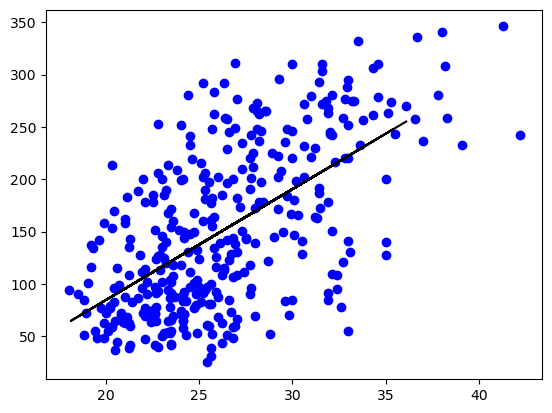

In [13]:
plt.scatter(np.array(X_train['BMI']).reshape(-1,1), y_train,color='b') 

plt.plot(np.array(X_test['BMI']).reshape(-1,1), y_pred,color='k') 

plt.show()

In [14]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 4150.680189329984


### Creating a plot of predicted vs actual values and highlighting the area within the error range of 100

[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

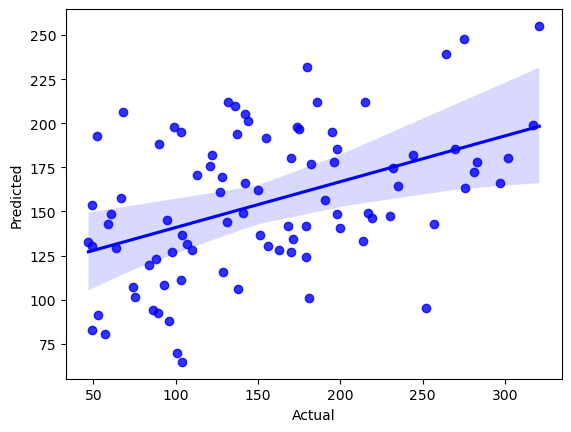

In [15]:
ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');

ax.set(xlabel='Actual', ylabel='Predicted')

### Creating a model with 2 features i.e. BMI and S5

In [16]:
reg = LinearRegression().fit(X_train[['BMI','S5']], y_train)
print('Model co-edficiants: ',reg.coef_)
print('y-intercept: ',reg.intercept_)

Model co-edficiants:  [ 7.52114385 56.78994031]
y-intercept:  -309.88941977389857


#### plotting the graph of actual values vs the predicted values from the test data

[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

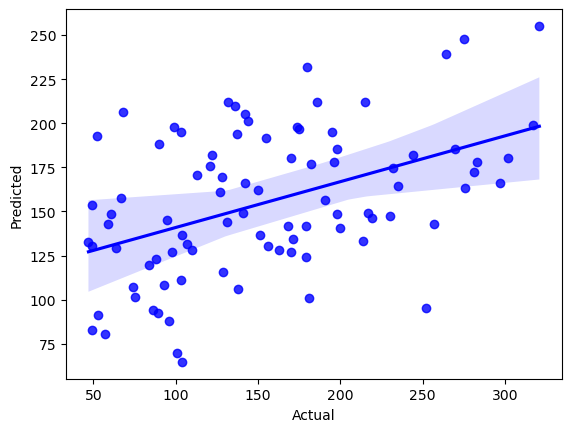

In [17]:
ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');

ax.set(xlabel='Actual', ylabel='Predicted')


In [18]:
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  4150.680189329984


## Using all the features

Model co-edficiants:  [ -0.12913765 -23.17892315   6.06552053   1.05166525  -0.91184795
   0.50762522   0.0911161    6.28518199  66.69316116   0.17823872]
y-intercept:  -308.7500059628476
MSE:  3424.259334298693


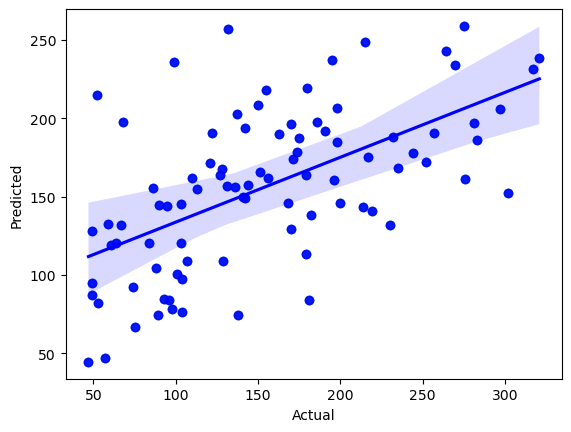

In [19]:
reg = LinearRegression().fit(X_train, y_train)
print('Model co-edficiants: ',reg.coef_)
print('y-intercept: ',reg.intercept_)

y_pred = reg.predict(X_test)

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');

ax.set(xlabel='Actual', ylabel='Predicted')


print('MSE: ', mean_squared_error(y_test, y_pred))

## Defining the functions to calculate the MSE for training and validation

In [20]:
#reference https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/

def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

## For N_train = 20

Model co-eficiants:  [ 1.39455767e-01 -4.19145350e+01  6.78219422e+00 -4.90186254e-02
 -2.11952888e+00  1.04437186e+00  2.92105663e+00  2.81318683e+01
  1.33657204e+02 -1.68055592e-02]
y-intercept:  -592.3813625939111
train error: 1970.38 | test error: 4522.89
train/test: 2.3


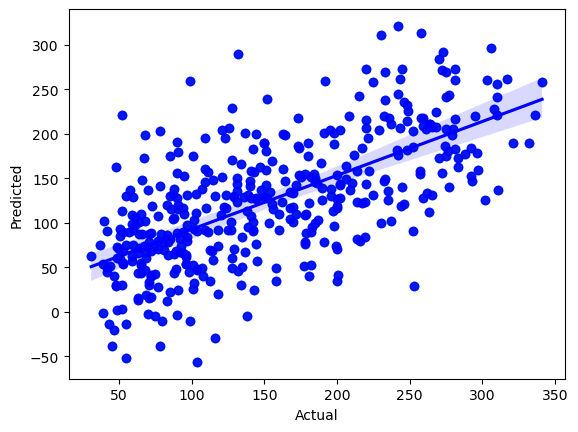

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=20, random_state=10)

reg = LinearRegression().fit(X_train, y_train)
print('Model co-eficiants: ', reg.coef_)
print('y-intercept: ', reg.intercept_)

y_pred = reg.predict(X_test[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']])

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');
ax.set(xlabel='Actual', ylabel='Predicted')

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, reg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

## For N_train = 50

Model co-eficiants:  [-9.34244795e-01 -4.30736165e+01  6.67212561e+00  4.76101090e-01
  1.26321144e+00 -1.05249289e+00 -1.53124841e+00  3.91803489e-02
  9.45078678e+00  3.00339534e-01]
y-intercept:  -84.96432063699265
train error: 2414.396 | test error: 3910.436
train/test: 1.6


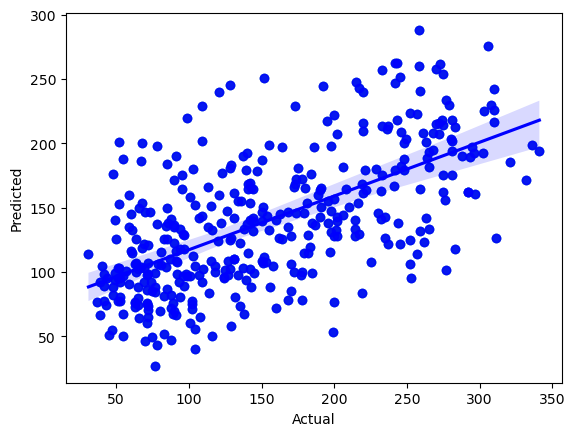

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=50, random_state=10)

reg = LinearRegression().fit(X_train, y_train)
print('Model co-eficiants: ', reg.coef_)
print('y-intercept: ', reg.intercept_)

y_pred = reg.predict(X_test[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']])

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');
ax.set(xlabel='Actual', ylabel='Predicted')

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, reg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

## For N_train = 100

Model co-eficiants:  [-1.53535283e-03 -5.27376061e+01  5.11439962e+00  1.36826352e+00
 -1.62491981e+00  1.02069494e+00  1.26205938e+00  1.73423451e+01
  6.34292016e+01  1.01955196e+00]
y-intercept:  -373.63996340859154
train error: 2744.996 | test error: 3283.605
train/test: 1.2


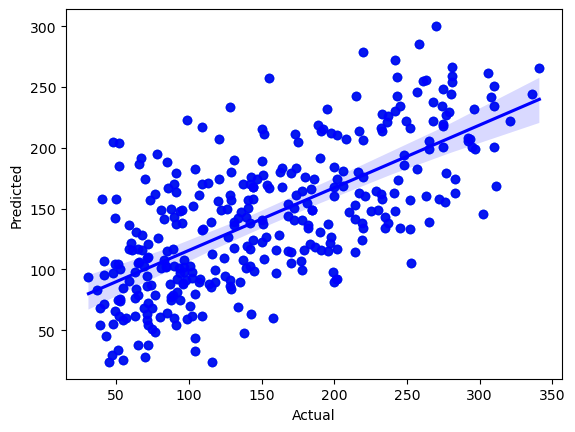

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=100, random_state=10)

reg = LinearRegression().fit(X_train, y_train)
print('Model co-eficiants: ', reg.coef_)
print('y-intercept: ', reg.intercept_)

y_pred = reg.predict(X_test[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']])

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');
ax.set(xlabel='Actual', ylabel='Predicted')

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, reg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

## For N_train =200

Model co-eficiants:  [ -0.16190617 -36.93540114   6.72906125   1.16058231  -1.42302871
   0.74522708   0.99126284  16.90533536  57.38158136   0.74509593]
y-intercept:  -344.5937377116088
train error: 2605.421 | test error: 3312.656
train/test: 1.3


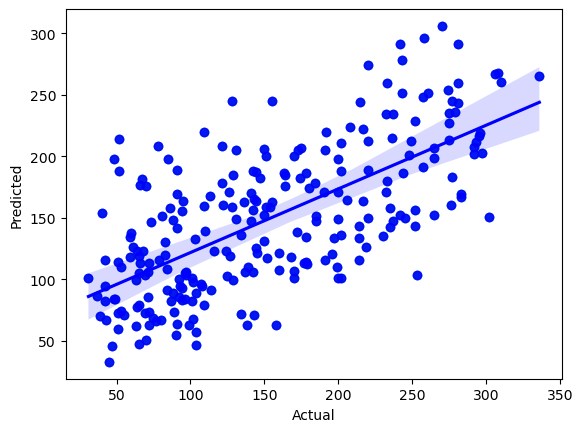

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=200, random_state=10)

reg = LinearRegression().fit(X_train, y_train)
print('Model co-eficiants: ', reg.coef_)
print('y-intercept: ', reg.intercept_)

y_pred = reg.predict(X_test[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']])

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');
ax.set(xlabel='Actual', ylabel='Predicted')

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, reg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

# XG Boost

In [25]:
#!pip install xgboost

In [26]:
from xgboost import XGBRegressor

## Defining the regressor model's parameters

In [27]:
#booster = gblinear -> to get the model coeficiants and intercept values 
model = XGBRegressor(n_estimators=5000, n_jobs= 10, booster='gblinear', eval_metric='rmse')

Model co-eficiants:  [10.9003]
y-intercept:  [-140.024]
train error: 4078.322 | test error: 3876.11
train/test: 1.0


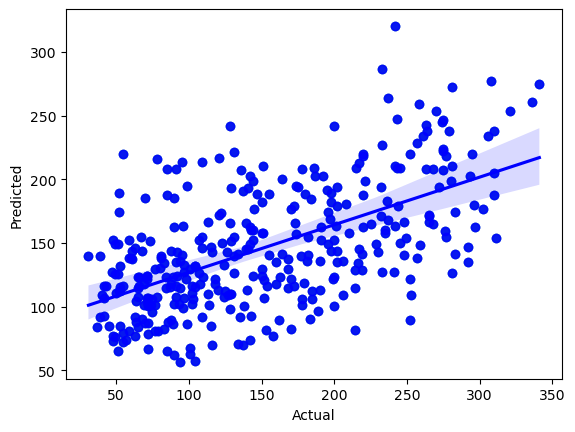

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.2, random_state=10)

model.fit(X_train['BMI'],y_train)

print('Model co-eficiants: ', model.coef_)
print('y-intercept: ', model.intercept_)

y_pred = model.predict(X_test['BMI'])

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');
ax.set(xlabel='Actual', ylabel='Predicted')

train_error, test_error = calc_metrics(np.array(X_train['BMI']).reshape(-1,1), y_train, np.array(X_test['BMI']).reshape(-1,1), y_test, reg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

Model co-eficiants:  [ 8.25898 54.8663 ]
y-intercept:  [-325.938]
train error: 3394.394 | test error: 3211.315
train/test: 0.9


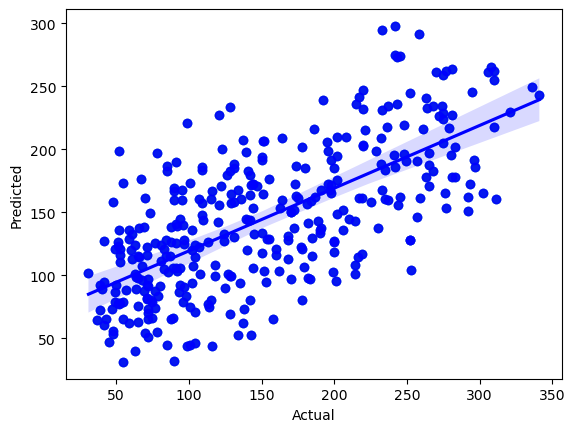

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.2, random_state=10)

model.fit(X_train[['BMI','S5']],y_train)

print('Model co-eficiants: ', model.coef_)
print('y-intercept: ', model.intercept_)

y_pred = model.predict(X_test[['BMI','S5']])

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');
ax.set(xlabel='Actual', ylabel='Predicted')

train_error, test_error = calc_metrics(X_train[['BMI','S5']], y_train, X_test[['BMI','S5']], y_test, reg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

Model co-eficiants:  [-5.08625e-01 -4.95492e+01  5.34822e+00  1.40736e+00 -6.45756e-01
  1.60093e-02 -4.69716e-02  1.39401e+01  4.08669e+01  1.14382e+00]
y-intercept:  [-259.08]
train error: 2620.95 | test error: 3301.517
train/test: 1.3


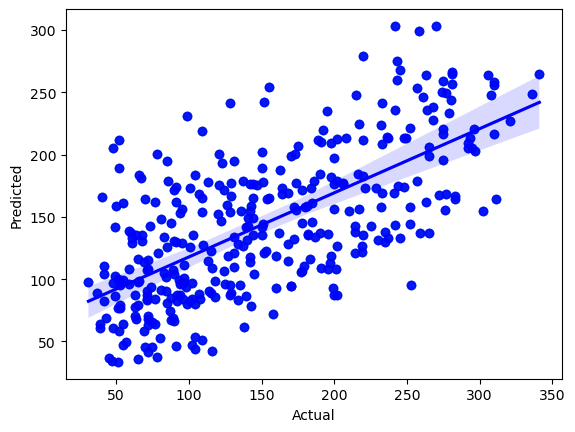

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.2, random_state=10)

model.fit(X_train,y_train)

print('Model co-eficiants: ', model.coef_)
print('y-intercept: ', model.intercept_)

y_pred = model.predict(X_test)

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

ax = sns.regplot(x=y_test,y=y_pred,ci=100,color ='blue');
ax.set(xlabel='Actual', ylabel='Predicted')

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, reg)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))